# Demonstraçãs Gráfica de Extração de Características

### Carregando Dataset

In [5]:
import os
import scipy.io
import numpy as np

caminhos = [os.path.join("src", nome) for nome in os.listdir("src")]
pessoas = []

for essive in caminhos:
    if essive != "/novo.txt":
        mat = scipy.io.loadmat(essive)
        tip = [mat['tip_ch1'], mat['tip_ch2']]
        spher = [mat['spher_ch1'], mat['spher_ch2']]
        palmar = [mat['palm_ch1'], mat['palm_ch2']]
        lateral = [mat['lat_ch1'], mat['lat_ch2']]
        cilindrical = [mat['cyl_ch1'], mat['cyl_ch2']]
        hook = [mat['hook_ch1'], mat['hook_ch2']]
        data = [tip, spher, palmar, lateral, cilindrical, hook]
        data = np.array(data)
        pessoas.append(data)  
        
        
dataone = pessoas[2]
dataone = np.array(dataone)
dataone = np.swapaxes(dataone,1,2)

print(dataone.shape)

(6, 30, 2, 3000)


### Segmentação

In [35]:
datax = []
segmentosize = (len(dataone[0,0,0,:]))/6
salto = segmentosize * 0.7
antpasso = segmentosize - salto
print(dataone.shape)
#dataone = dataone.reshape(6,30,2,25,)

print("Sobreposicao:        ", antpasso)
print("Salto:               ",salto)
print("Tamanho do segmento: ",segmentosize)


for movimento in dataone:  
    tentativs = []
    for tentativas in movimento:
        canals = []
        for canal in tentativas:
            
            listinha = []
            listinha.append(canal[350:850])
            listinha.append(canal[700:1200])
            listinha.append(canal[1050:1550])
            listinha.append(canal[1400:1900])
            listinha.append(canal[1750:2250])
            listinha.append(canal[2100:2600])
            canals.append(np.split(canal,6) + listinha)
        tentativs.append(canals)
    datax.append( tentativs)
datax = np.array(datax)
print(datax.shape)

(6, 30, 2, 3000)
Sobreposicao:         150.0
Salto:                350.0
Tamanho do segmento:  500.0
(6, 30, 2, 12, 500)


### Imprimindo o Segmento

In [37]:
print(datax[0,0,0])
segmento = datax[0,0,0]

[[ 0.123201  0.174205  0.174205 ...  0.403719 -0.080812  0.0977  ]
 [ 0.862749  0.429221 -0.335828 ...  0.123201 -0.106313  0.582231]
 [-0.080812  0.607732 -0.182818 ... -0.233821 -0.284825  0.199706]
 ...
 [-0.131815  0.556729  0.0977   ...  0.480224  0.352716  0.072198]
 [ 0.837247 -0.896864 -1.100877 ... -0.922366  0.378218  0.633234]
 [ 0.684237  0.199706  0.480224 ... -0.488838 -0.029808  0.505726]]


### Plotando o Segmento

In [38]:

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

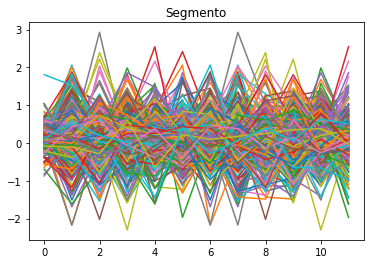

In [39]:
plt.plot(segmento )
plt.title("Segmento")
plt.show()

#### Extração IEMG 

In [44]:
IEMG = []

for value in segmento:
    IEMG.append(np.sum([abs(x) for x in value]))
print(IEMG)

[98.654748, 217.172731, 200.289967, 216.51727599999998, 183.03295500000002, 188.659852, 191.54256800000002, 212.556931, 203.23954700000002, 213.55047000000002, 202.585105, 189.425592]


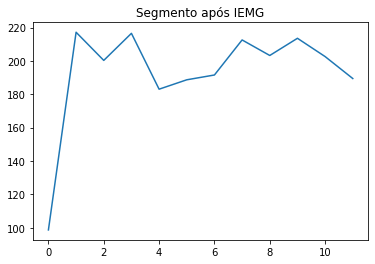

In [45]:
plt.plot(IEMG )
plt.title("Segmento após IEMG")
plt.show()